<a href="https://colab.research.google.com/github/jaewoongy/Predicting_Disaster_Tweets/blob/main/Natural_Language_Processing_with_Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color='teal'>Data Setup</font>**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown --id 15Vh-MTZAhWWTxVccW0smvJvpy8x5rNPa
!gdown --id 1F3pOCy0adnt6yadk0CP3FVmYJDNdt7QQ
!gdown --id 1_J3SyLijON45Zpf-SsfWVBY2ODRE1emw


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15Vh-MTZAhWWTxVccW0smvJvpy8x5rNPa
To: /content/test.csv
100% 421k/421k [00:00<00:00, 96.5MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1F3pOCy0adnt6yadk0CP3FVmYJDNdt7QQ
To: /content/train.csv
100% 988k/988k [00:00<00:00, 108MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Access denied with the following e

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
#Added a column for both train and test dataframes to find the length of each text.

train['length'] = train['text'].apply(len)
test['length'] = test['text'].apply(len)

print(train.head())
print(train.length.describe(), '\n') #Statistics of length of each text
print(test.length.describe())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  length  
0       1      69  
1       1      38  
2       1     133  
3       1      65  
4       1      88  
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64 

count    3263.000000
mean      102.108183
std        33.972158
min         5.000000
25%        78.000000
50%       109.000000
75%       134.000000
max       151.000000
Name: length, dtype: float64


#**<font color='teal'>Some Data Visualizations</font>**


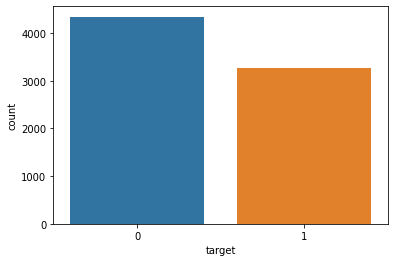

In [ ]:
sns.countplot(data = train, x = 'target')

#This data shows the number of fake tweets (0) and real tweets (1) (Around 57% are fake, 43% real)

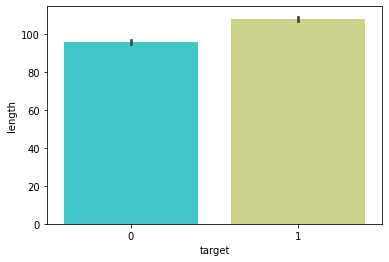

In [ ]:
sns.barplot(x='target', y = train.length, data=train, palette='rainbow')
#Some data analysis: real tweets tend to have longer length tweets.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3449866dd0>,
      dtype=object)

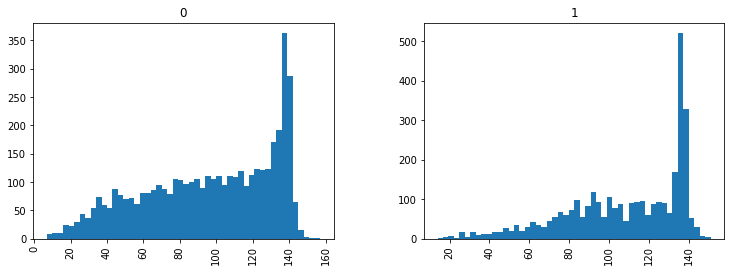

In [ ]:
train.hist(column='length', by='target', bins=50,figsize=(12,4))

#Majority of the tweets range from 130-145 words in length. Way more real tweets are in the 130-140 range than the fake tweets.

#**<font color='teal'>Data Cleaning</font>**


In [ ]:
#Not using this code atm but made it just in case: 
#This block turns the text in the train dataframe into one entire string

train_fulltext = ''
for value in train.text:
    train_fulltext = train_fulltext + ' ' + value
print(train_fulltext[:500])

 Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask. Canada All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected 13,000 people receive #wildfires evacuation orders in California  Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #


In [ ]:
#Using this to clean data in the next block

import string
import spacy

en = spacy.load('en_core_web_sm')
stopwords = en.Defaults.stop_words
print(stopwords)

{'several', 'whom', 'the', '‘re', 'yours', "'ve", 'thereby', 'per', '‘ll', 'due', 'up', 'about', 'nine', 'we', 'us', 'though', 'were', 'yourself', 'to', 'during', 'really', 'than', 'thence', 'nowhere', 'regarding', 'him', 'can', 'therefore', 'where', 'last', 'via', 'anyway', 'i', 'along', 'who', 'say', '‘m', 'sometime', 'within', 'myself', 'himself', 'third', 'eight', 'give', 'further', 'whose', 'their', 'hereby', 'hers', 'under', 'using', 'whereas', 'keep', 'nobody', 'latter', 'am', 'on', 'mine', 'hence', 'anyhow', 'be', 'them', 'may', 'thereupon', 'your', 'whether', 'neither', 'something', 'fifteen', 'therein', 'should', 'above', 'thus', 'throughout', 'unless', 'own', 'serious', 'anywhere', 'ever', 'else', 'has', 'n‘t', 'first', 'being', "'d", 'n’t', 'very', 'against', 'did', 'all', 'quite', 'for', 'not', 'take', 'twelve', 'beyond', 'any', '‘ve', 'across', 'made', 'enough', 'wherever', 'becoming', 'until', 'eleven', 'five', 'former', 'no', 'perhaps', 'thereafter', 'while', 'through',

In [ ]:
#This block is to clean data (remove punctuation and stop words since they're considered meaningless (according to my udemy lesson))
#This might interfere with our dataset since some stopwords/punctuation may be useful in determining whether a tweet is fake or not.
#But, let's worry about optimization after we make the basic nlp model.


def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords]

In [ ]:
train.text[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [ ]:
text_process(train.text[0])

['Deeds', 'Reason', 'earthquake', 'ALLAH', 'Forgive']

In [ ]:
#Applied text_process to the entire train and test dataset
train['cleaned_text'] = train['text'].apply(text_process)
test['cleaned_text'] = test['text'].apply(text_process)

In [ ]:
train.head()

,id,keyword,location,text,target,length,cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,"[Deeds, Reason, earthquake, ALLAH, Forgive]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,"[got, sent, photo, Ruby, Alaska, smoke, wildfi..."


#**<font color='teal'>Vectorization and TFIDF</font>**


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
train_bow = CountVectorizer().fit_transform(train['text']).toarray()


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(train_bow)
train_tfidf = tfidf_transformer.transform(train_bow)

#**<font color='teal'>Train Test Split</font>**


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, train['target'], test_size = 0.3, random_state = 101)

#**<font color='teal'>MultinomialNB</font>**


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
fake_detect_model = MultinomialNB().fit(X_train, y_train)

In [ ]:
all_predictions = fake_detect_model.predict(X_test)
print(all_predictions)

[0 1 0 ... 1 0 0]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(all_predictions, y_test))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1576
           1       0.63      0.84      0.72       708

    accuracy                           0.80      2284
   macro avg       0.77      0.81      0.78      2284
weighted avg       0.83      0.80      0.80      2284



#**<font color='teal'>Bernoulli Naive Bayes</font>**


In [ ]:
from sklearn.naive_bayes import BernoulliNB

fake_detect_model = BernoulliNB().fit(X_train, y_train)
all_predictions = fake_detect_model.predict(X_test)
print(classification_report(all_predictions, y_test))

              precision    recall  f1-score   support

           0       0.91      0.79      0.84      1536
           1       0.66      0.84      0.74       748

    accuracy                           0.80      2284
   macro avg       0.78      0.81      0.79      2284
weighted avg       0.83      0.80      0.81      2284



#**<font color='teal'>Linear Support Vector Machine</font>**


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)

sgd = sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))


accuracy 0.7788966725043783
